In [1]:
%load_ext autoreload
%autoreload 2

# GPT3.5 model results on Sentiment Analysis

In [2]:
import os
import sys

# Get the current working directory
notebook_dir = os.getcwd()

# Change the working directory to the root directory of the project
os.chdir("../")

# move up to the parent directory(project root)
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "..")))

os.getcwd()

'c:\\Users\\mhannani\\Documents\\sentiment_analysis'

In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils.readers import read_df
from src.utils.parsers import parse_toml
from src.utils.counters import count_nans

In [4]:
# configration filepath
CONFIG_FILE = Path("configs/config.toml")

# read configuration object
config = parse_toml(CONFIG_FILE)

# useful variables
data_root = Path(config['data']['root'])
exernal_data = config['data']['external']
raw_data = config['data']['raw']
interim_data = config['data']['interim']
processed_data = config['data']['processed']
mac_csv_filename = config['data']['mac_csv_filename']

# output root
mac_output_root = Path(config['output']['root'])
csv_gpt_results_mac_filename = config['output']['mac_tsv_predictions']


# constructing the filepath of the corpus
csv_filepath_raw_data = data_root / raw_data / mac_csv_filename

# constructing the filepath of the results of mac dataset
tsv_gpt_results_mac_filepath = mac_output_root / csv_gpt_results_mac_filename

In [5]:
df = read_df(tsv_gpt_results_mac_filepath, sep = "\t")

In [6]:
df

,key,tweets,gt_type,pred_type,class_name
0,1,ماهي آرائكم متتبعي الكرام,0,0.0,0.0
1,2,عبقرية المدرب وروعة اللاعبين,1,1.0,0.0
2,3,أمة عربية واحدة خالدة,1,1.0,0.0
3,1,ماهي آرائكم متتبعي الكرام,0,0.0,0.0
4,2,عبقرية المدرب وروعة اللاعبين,1,1.0,0.0
...,...,...,...,...,...
17439,17437,ريالية و افتخر و نعلي راسي الفوق,1,1.0,1.0
17440,17438,ماكاين مشكل,1,-1.0,1.0
17441,17439,سمح ليا ماقصدتش,1,0.0,1.0
17442,17440,الله يكمل عليها بالخير,1,1.0,1.0


In [7]:
gt_type_column_nans_count = count_nans(df, "gt_type")
pred_type_column_nans_count = count_nans(df, "pred_type")
class_name_column_nans_count = count_nans(df, "class_name")

In [8]:
gt_type_column_nans_count, pred_type_column_nans_count, class_name_column_nans_count

(0, 0, 0)

In [9]:
df['gt_type'] = df['gt_type'].astype(float)

In [10]:
df.head()

,key,tweets,gt_type,pred_type,class_name
0,1,ماهي آرائكم متتبعي الكرام,0.0,0.0,0.0
1,2,عبقرية المدرب وروعة اللاعبين,1.0,1.0,0.0
2,3,أمة عربية واحدة خالدة,1.0,1.0,0.0
3,1,ماهي آرائكم متتبعي الكرام,0.0,0.0,0.0
4,2,عبقرية المدرب وروعة اللاعبين,1.0,1.0,0.0


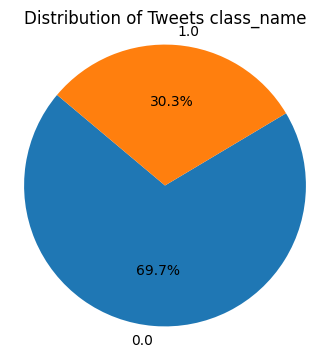

In [39]:
from src.utils.visualizers import visualize_frequencies


visualize_frequencies(df, 'class_name')

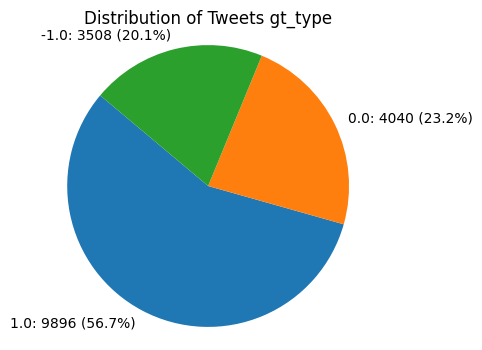

In [42]:
visualize_frequencies(df, 'gt_type')

## Evaluation & Visualization

In [11]:
from src.utils.visualizers import Visualizer
from src.utils.evaluator import Evaluator

### 1- Across All Dataset with averaging for types(pos., neg., neutral)

In [36]:
evaluator = Evaluator(df, across_class_names = True, averaging = 'weighted')
visualisor = Visualizer(evaluator)

evaluator()

{'standard': {'accuracy': 0.7101365805496133,
  'precision': 0.7415774694336716,
  'recall': 0.7101365805496133,
  'f1': 0.7130243896764636,
  'conf_matrix': array([[1358,  706,  459],
         [  70, 1543, 1116],
         [  24, 1148, 5730]], dtype=int64),
  'class_report': '              precision    recall  f1-score   support\n\n        -1.0       0.94      0.54      0.68      2523\n         0.0       0.45      0.57      0.50      2729\n         1.0       0.78      0.83      0.81      6902\n\n    accuracy                           0.71     12154\n   macro avg       0.72      0.64      0.66     12154\nweighted avg       0.74      0.71      0.71     12154\n'},
 'dialectical': {'accuracy': 0.6909262759924386,
  'precision': 0.7143002691596677,
  'recall': 0.6909262759924386,
  'f1': 0.6888643097814963,
  'conf_matrix': array([[ 404,  332,  249],
         [  60,  854,  397],
         [  50,  547, 2397]], dtype=int64),
  'class_report': '              precision    recall  f1-score   supp

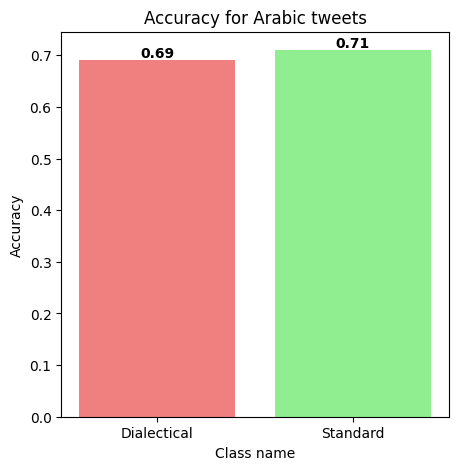

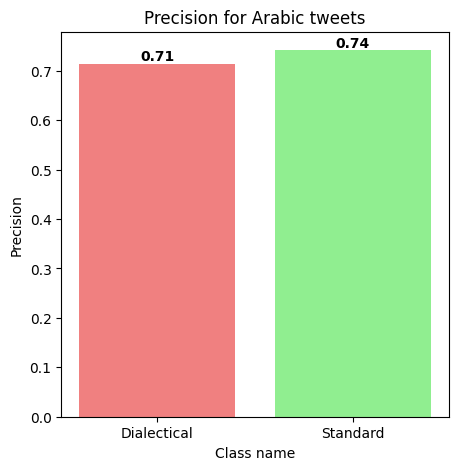

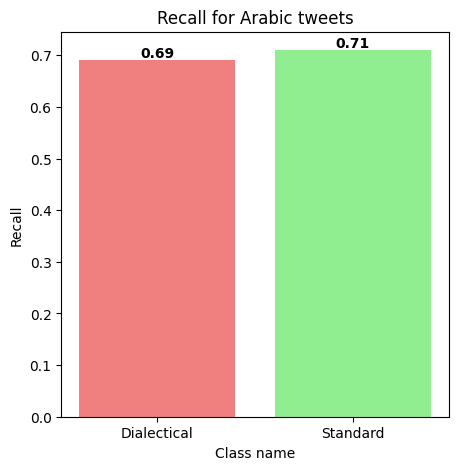

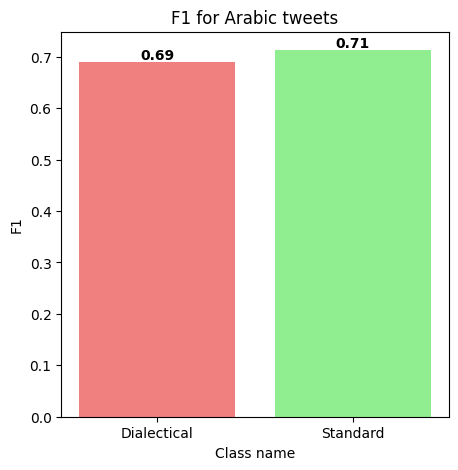

In [37]:
accuracy = visualisor.visualize('accuracy')
precision = visualisor.visualize('precision')
recall = visualisor.visualize('recall')
f1 = visualisor.visualize('f1')

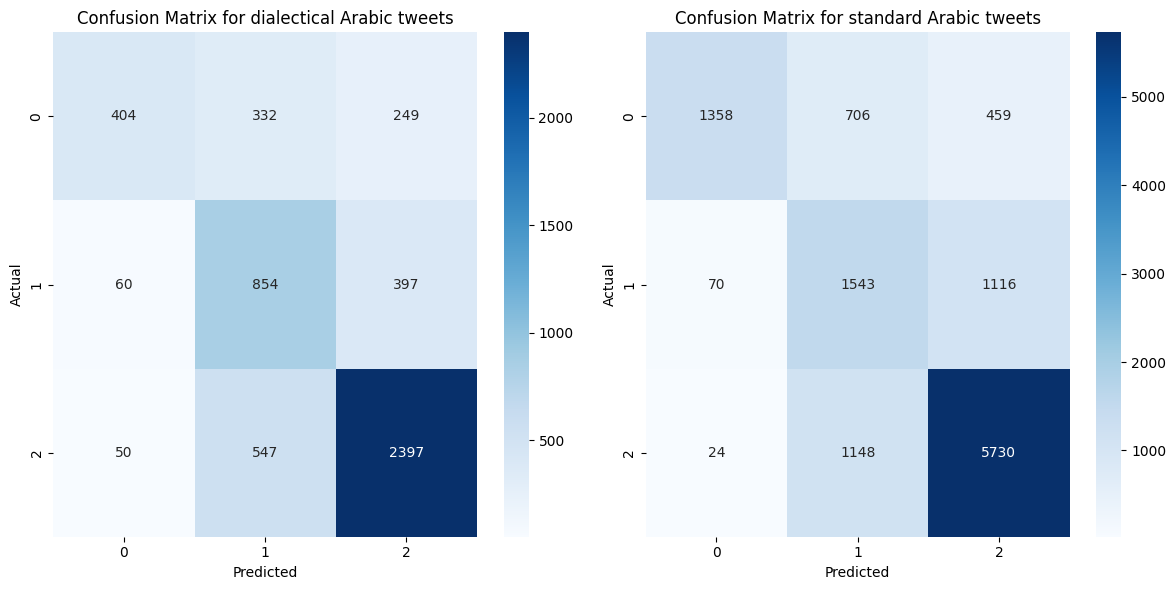

In [38]:
visualisor.show_cfm()

Takeaways:

- 70.4 % (accracy) of tweets are classified correctly by the GPT model,
- 73.4 % (precision or the accuracy of positive predictions) of tweets predicted as positive are actually positive,
- 70.4 % (recall/sensitivity) of actual positive tweets are predicted as positive by the GPT model.
- 70.6 % (F1 score) mean of precision and recall, since the dataset is imbalanced, that's the metrics that we need to pay attention to.

### 2- Across All Dataset without averaging

In [28]:
evaluator = Evaluator(df, across_class_names = False, averaging = None)
visualisor = Visualizer(evaluator)

In [29]:
visualisor.visualize('accuracy')

Accuracy: 0.7043109378582894


0.7043109378582894

Takeaways:

- 70.4 % (accracy) of tweets are classified correctly by the GPT model,

In [30]:
evaluator()

{'accuracy': 0.7043109378582894,
 'precision': array([0.89623601, 0.46725146, 0.78536915]),
 'recall': array([0.5022805 , 0.59331683, 0.82124091]),
 'f1': array([0.64377055, 0.52279171, 0.80290456]),
 'conf_matrix': array([[1762, 1038,  708],
        [ 130, 2397, 1513],
        [  74, 1695, 8127]], dtype=int64),
 'class_report': '              precision    recall  f1-score   support\n\n        -1.0       0.90      0.50      0.64      3508\n         0.0       0.47      0.59      0.52      4040\n         1.0       0.79      0.82      0.80      9896\n\n    accuracy                           0.70     17444\n   macro avg       0.72      0.64      0.66     17444\nweighted avg       0.73      0.70      0.71     17444\n'}

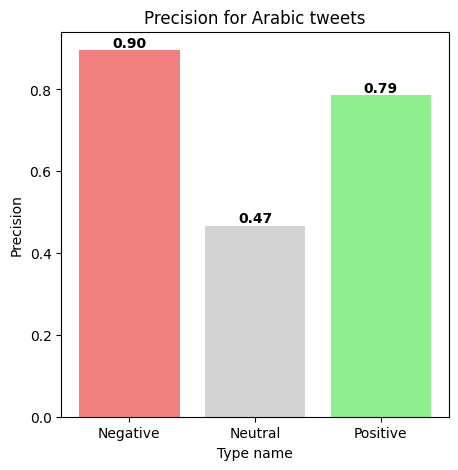

In [16]:
visualisor.visualize('precision')

Takeaways:

- Out of all tweet predicted by the model as negative, 90 % were correclty classified correctly as negative.
- Out of all tweet predicted by the model as neutral, 47 % were correclty classified correctly neutral.
- Out of all tweet predicted by the model as positive, 79 % were correclty classified correctly as positive.


-> The model find it challenging to be precise in classifying tweets as neutral sentiments compared to negative and positive one.

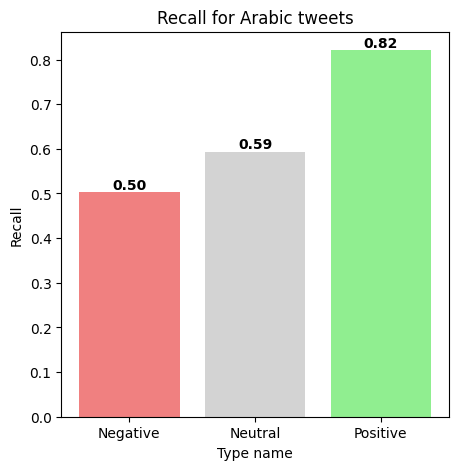

In [17]:
visualisor.visualize('recall')


Takeaways:

- Out of all tweet predicted by the model as negative, 90 % were correclty classified correctly as negative.
- Out of all tweet predicted by the model as neutral, 47 % were correclty classified correctly neutral.
- Out of all tweet predicted by the model as positive, 79 % were correclty classified correctly as positive.


-> The model find it challenging to be precise in classifying tweets as neutral sentiments compared to negative and positive one.

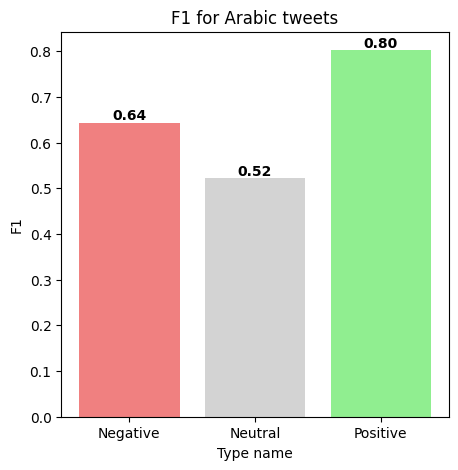

In [18]:
visualisor.visualize('f1')

### 3- Across data portions (class_name types: Dialectical and Standard) Dataset with averaging

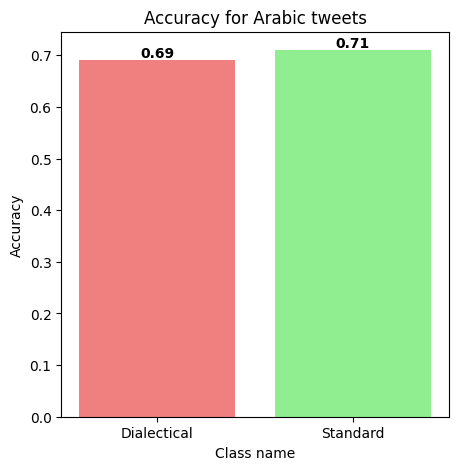

In [19]:
evaluator = Evaluator(df, across_class_names = True, averaging = 'weighted')
visualisor = Visualizer(evaluator)

visualisor.visualize('accuracy')

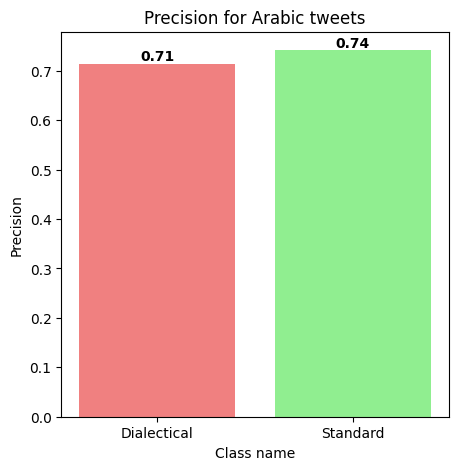

In [20]:
visualisor.visualize('precision')


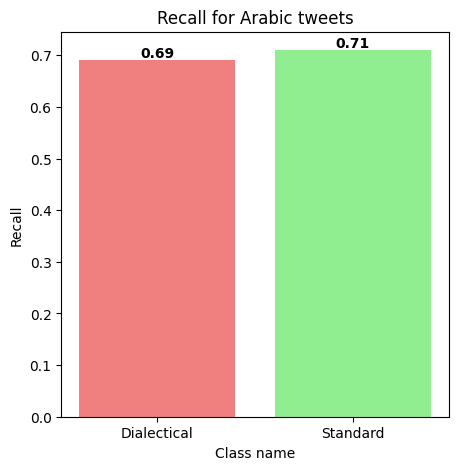

In [21]:
visualisor.visualize('recall')


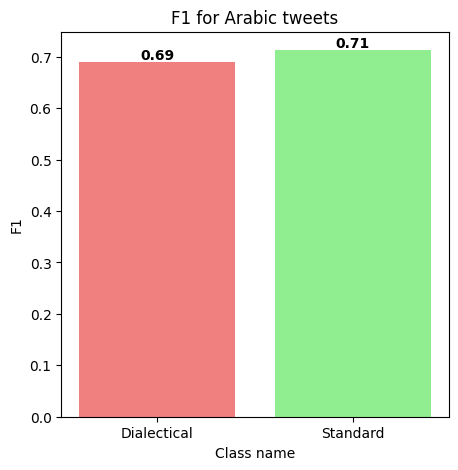

In [22]:
visualisor.visualize('f1')

### 4- Across data portions (class_name types: Dialectical and Standard) Dataset without averaging

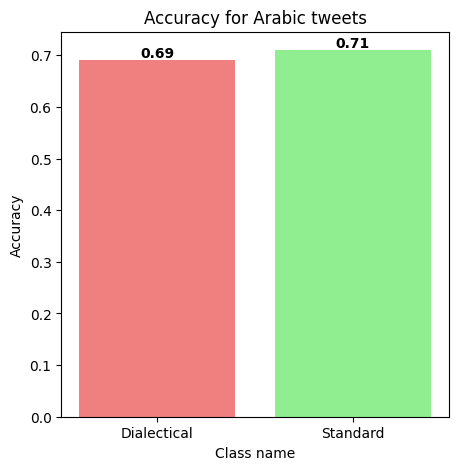

In [23]:
evaluator = Evaluator(df, across_class_names = True, averaging = None)
visualisor = Visualizer(evaluator)

visualisor.visualize('accuracy')


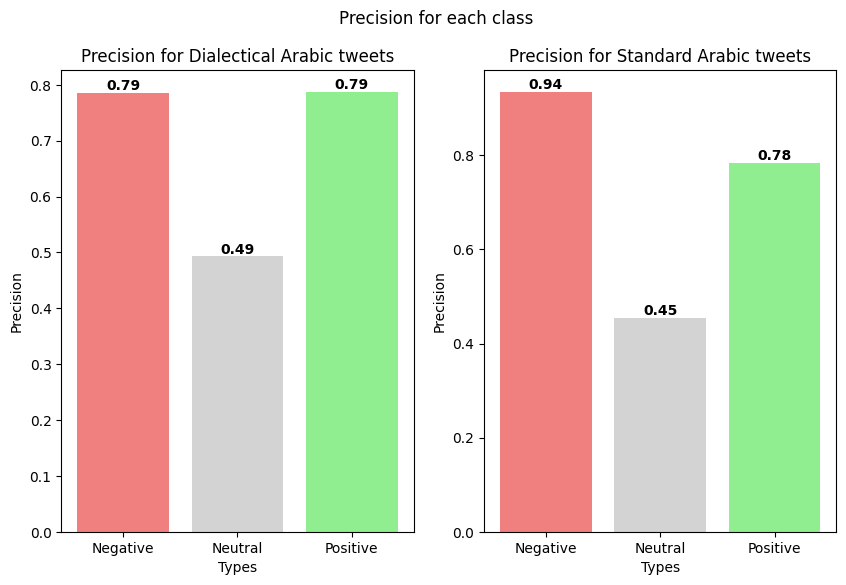

In [24]:
visualisor.visualize('precision')


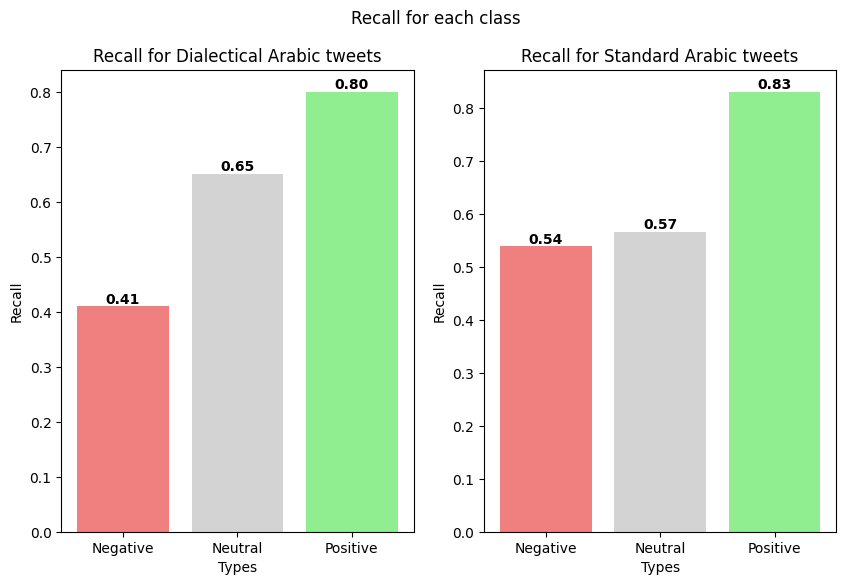

In [25]:
visualisor.visualize('recall')


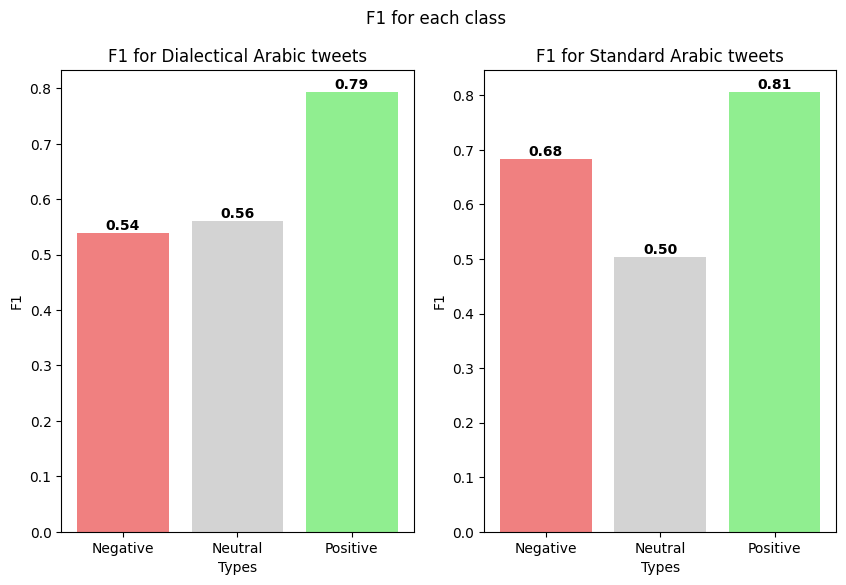

In [26]:
visualisor.visualize('f1')